<a href="https://colab.research.google.com/github/AASTHA1102/Machine-Learning/blob/main/2_Flower_deepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [ ]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Upload Dataset

In [ ]:
train_dir='/content/drive/MyDrive/Colab Notebooks/Deep Learning Datasets/DAISY_DANDELIONS_ROSE/drive-download-20220929T104114Z-001/train'
test_dir='/content/drive/MyDrive/Colab Notebooks/Deep Learning Datasets/DAISY_DANDELIONS_ROSE/drive-download-20220929T104114Z-001/test'
val_dir='/content/drive/MyDrive/Colab Notebooks/Deep Learning Datasets/DAISY_DANDELIONS_ROSE/drive-download-20220929T104114Z-001/val'

Creating Batches
(knowing count of data in the dataset)

In [ ]:
Batch_Size=8
IMG_SIZE=(128,128)
train_ds=tf.keras.preprocessing.image_dataset_from_directory(train_dir,shuffle=True,batch_size=Batch_Size,image_size=IMG_SIZE)
test_ds=tf.keras.preprocessing.image_dataset_from_directory(test_dir,shuffle=True,batch_size=Batch_Size,image_size=IMG_SIZE)
val_ds=tf.keras.preprocessing.image_dataset_from_directory(val_dir,shuffle=True,batch_size=Batch_Size,image_size=IMG_SIZE)

Found 114 files belonging to 3 classes.
Found 34 files belonging to 3 classes.
Found 26 files belonging to 3 classes.


Class name details

In [ ]:
class_names=train_ds.class_names
print(class_names)

['daisy', 'dandi', 'rose']


(8, 128, 128, 3)
(8,)
tf.Tensor([2 0 0 0 1 1 2 1], shape=(8,), dtype=int32)


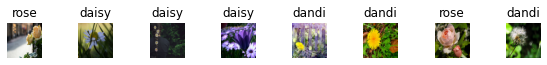

In [ ]:
# a single batch
# visulize
plt.figure(figsize=(10,6))
for image_batch,label_batch in train_ds.take(1):
    print(image_batch.shape)
    print(label_batch.shape)
    print(label_batch)
    for i in range(Batch_Size):
        plt.subplot(8,8,i+1)
        plt.imshow(image_batch[i]/255.0) # float [0-1],int[0-255]
        plt.axis('off')
        plt.title(class_names[label_batch[i]])

In [ ]:
img=[]
label=[]
for image_batch,label_batch in train_ds:
  img.append(image_batch)
  label.append(label_batch)
inputs=np.concatenate(img)
targets=np.concatenate(label)
print(inputs.shape)
print(targets.shape)

(114, 128, 128, 3)
(114,)


In [ ]:
train_batches=tf.data.experimental.cardinality(train_ds)
print('Training Batches=',train_batches.numpy())

Training Batches= 15


In [ ]:
IMG_HEIGHT=128
IMG_WIDTH=128
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, 
                                                            input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(3,"softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)       

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])  ## loss=least mean square for regression

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)       

In [ ]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=10, batch_size=8, verbose=1)

Epoch 1/10
15/15 [==============================] - 7s 421ms/step - loss: 3.5829 - accuracy: 0.2807 - val_loss: 1.1186 - val_accuracy: 0.3077
Epoch 2/10
15/15 [==============================] - 3s 167ms/step - loss: 1.0513 - accuracy: 0.4211 - val_loss: 1.1169 - val_accuracy: 0.2692
Epoch 3/10
15/15 [==============================] - 3s 175ms/step - loss: 0.8507 - accuracy: 0.5439 - val_loss: 1.1933 - val_accuracy: 0.3077
Epoch 4/10
15/15 [==============================] - 3s 170ms/step - loss: 0.7962 - accuracy: 0.6754 - val_loss: 1.1140 - val_accuracy: 0.3846
Epoch 5/10
15/15 [==============================] - 3s 159ms/step - loss: 0.5796 - accuracy: 0.7982 - val_loss: 1.0024 - val_accuracy: 0.5385
Epoch 6/10
15/15 [==============================] - 3s 161ms/step - loss: 0.4864 - accuracy: 0.8333 - val_loss: 1.0907 - val_accuracy: 0.4231
Epoch 7/10
15/15 [==============================] - 3s 165ms/step - loss: 0.4258 - accuracy: 0.8684 - val_loss: 0.9266 - val_accuracy: 0.5385
Epoch 

In [ ]:
loss, accuracy = model.evaluate(test_ds)

5/5 [==============================] - 4s 37ms/step - loss: 1.3892 - accuracy: 0.5882


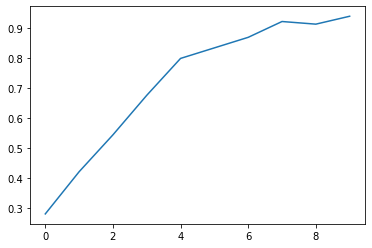

In [ ]:
d=hist.history
d.keys()
plt.plot(range(10),d['accuracy'])

In [ ]:
pred=model.predict(test_ds)


In [ ]:
p=np.argmax(pred,axis=1)

In [ ]:
img=[]
label=[]
for image_batch,label_batch in test_ds:
  img.append(image_batch)
  label.append(label_batch)
Timage=np.concatenate(img)
Tlabel=np.concatenate(label)
print(Timage.shape)
print(Tlabel.shape)

(34, 128, 128, 3)
(34,)


In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Tlabel,p)
cm

array([[10,  0,  0],
       [12,  0,  0],
       [12,  0,  0]])

(128, 128, 3)
(128, 128, 3)
(1, 128, 128, 3)
[[0.7755649  0.08498825 0.13944674]
 [0.7726252  0.12341607 0.10395872]]
Prob= 0.7755649
Label= 0
class= daisy


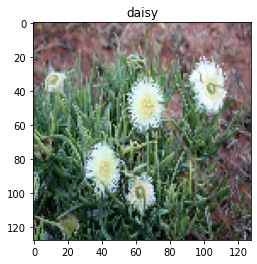

In [ ]:
i=5
im=Timage[i]
L=Tlabel[i]
print(im.shape)
plt.imshow(im/255)
plt.title(class_names[L])

print(im.shape)
im1=tf.expand_dims(im,axis=0)
print(im1.shape)
p=model.predict(image_batch)
print(p)
print('Prob=',np.max(p[0]))
print('Label=',np.argmax(p[0]))
print('class=',class_names[np.argmax(p[0])])

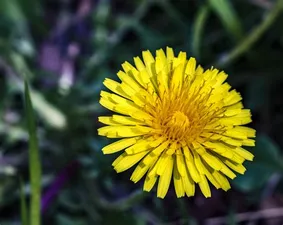

In [ ]:
import PIL
dir='/content/drive/MyDrive/Colab Notebooks/Deep Learning Datasets/DAISY_DANDELIONS_ROSE/drive-download-20220929T104114Z-001/da.jpeg'
PIL.Image.open(dir)

(225, 283, 3)


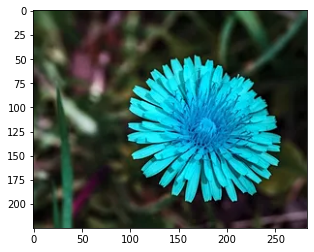

In [ ]:
from tensorflow.python.ops.logging_ops import print_v2
import cv2
dir='/content/drive/MyDrive/Colab Notebooks/Deep Learning Datasets/DAISY_DANDELIONS_ROSE/drive-download-20220929T104114Z-001/da.jpeg'
img=cv2.imread(dir)
print(img.shape)

import matplotlib.pyplot as plot
plt.imshow(img)

[[[0.16862746 0.3137255  0.18431373]
  [0.19215687 0.3372549  0.20784314]
  [0.21960784 0.3647059  0.24313726]
  ...
  [0.22352941 0.28235295 0.19215687]
  [0.27058825 0.3372549  0.20784314]
  [0.29411766 0.36078432 0.21176471]]

 [[0.16862746 0.3137255  0.18431373]
  [0.19215687 0.3372549  0.20784314]
  [0.21960784 0.3647059  0.24313726]
  ...
  [0.24313726 0.3019608  0.20392157]
  [0.28235295 0.3529412  0.21176471]
  [0.29411766 0.36078432 0.21176471]]

 [[0.16862746 0.30588236 0.18039216]
  [0.19215687 0.32941177 0.20392157]
  [0.21568628 0.35686275 0.23921569]
  ...
  [0.27058825 0.3254902  0.20784314]
  [0.2901961  0.35686275 0.2       ]
  [0.2784314  0.34901962 0.2       ]]

 ...

 [[0.07450981 0.10980392 0.10980392]
  [0.08627451 0.12156863 0.11764706]
  [0.08627451 0.12156863 0.11764706]
  ...
  [0.21960784 0.17254902 0.2509804 ]
  [0.18039216 0.14117648 0.20784314]
  [0.14509805 0.10980392 0.1764706 ]]

 [[0.1254902  0.18039216 0.17254902]
  [0.14117648 0.19607843 0.18431373]


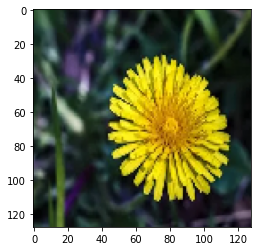

In [ ]:
#keras preprocessing layer
import tensorflow as tf
dir='/content/drive/MyDrive/Colab Notebooks/Deep Learning Datasets/DAISY_DANDELIONS_ROSE/drive-download-20220929T104114Z-001/da.jpeg'
img=tf.keras.preprocessing.image.load_img(dir,target_size=(128,128))
img=tf.keras.preprocessing.image.img_to_array(img)
img=img/255.0
print(img)
plt.imshow(img)  # float[0-1]
print(img.shape)

In [ ]:
im1=tf.expand_dims(img,axis=0)
print(im1.shape)
P=model.predict(im1)
P
print('Prob=',np.max(P[0]))
print('Label=',np.argmax(P[0]))
print('Class=',class_names[np.argmax(P[0])])

(1, 128, 128, 3)
Prob= 0.33499238
Label= 0
Class= daisy


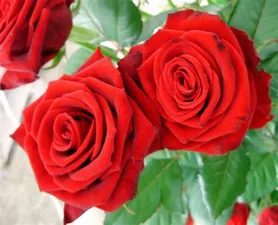

In [ ]:
import PIL
dir='/content/drive/MyDrive/Colab Notebooks/Deep Learning Datasets/DAISY_DANDELIONS_ROSE/drive-download-20220929T104114Z-001/r.webp'
PIL.Image.open(dir)

(225, 278, 3)


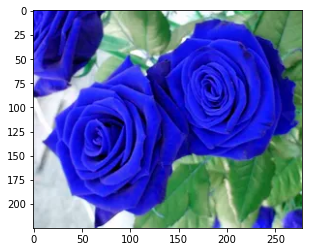

In [ ]:
from tensorflow.python.ops.logging_ops import print_v2
import cv2
dir='/content/drive/MyDrive/Colab Notebooks/Deep Learning Datasets/DAISY_DANDELIONS_ROSE/drive-download-20220929T104114Z-001/r.webp'
img=cv2.imread(dir)
print(img.shape)

import matplotlib.pyplot as plot
plt.imshow(img)

In [ ]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

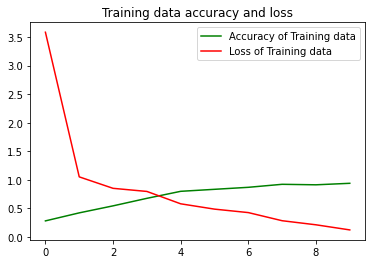

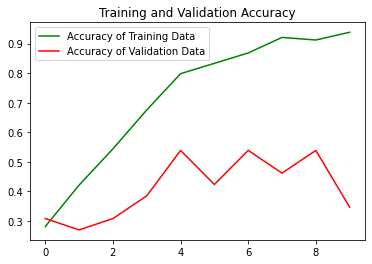

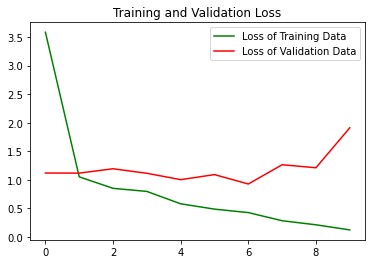

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()